# Predicting the risk of heart attack in individuals based on physiological indicators?

### Importing modules

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def load_data():
    df = pd.read_csv('../res/heart_attack_prediction_dataset.csv')
    return df

In [3]:
df = load_data()
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Check each column for how many nulls they each contain
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Exploratory Data Analysis (EDA)

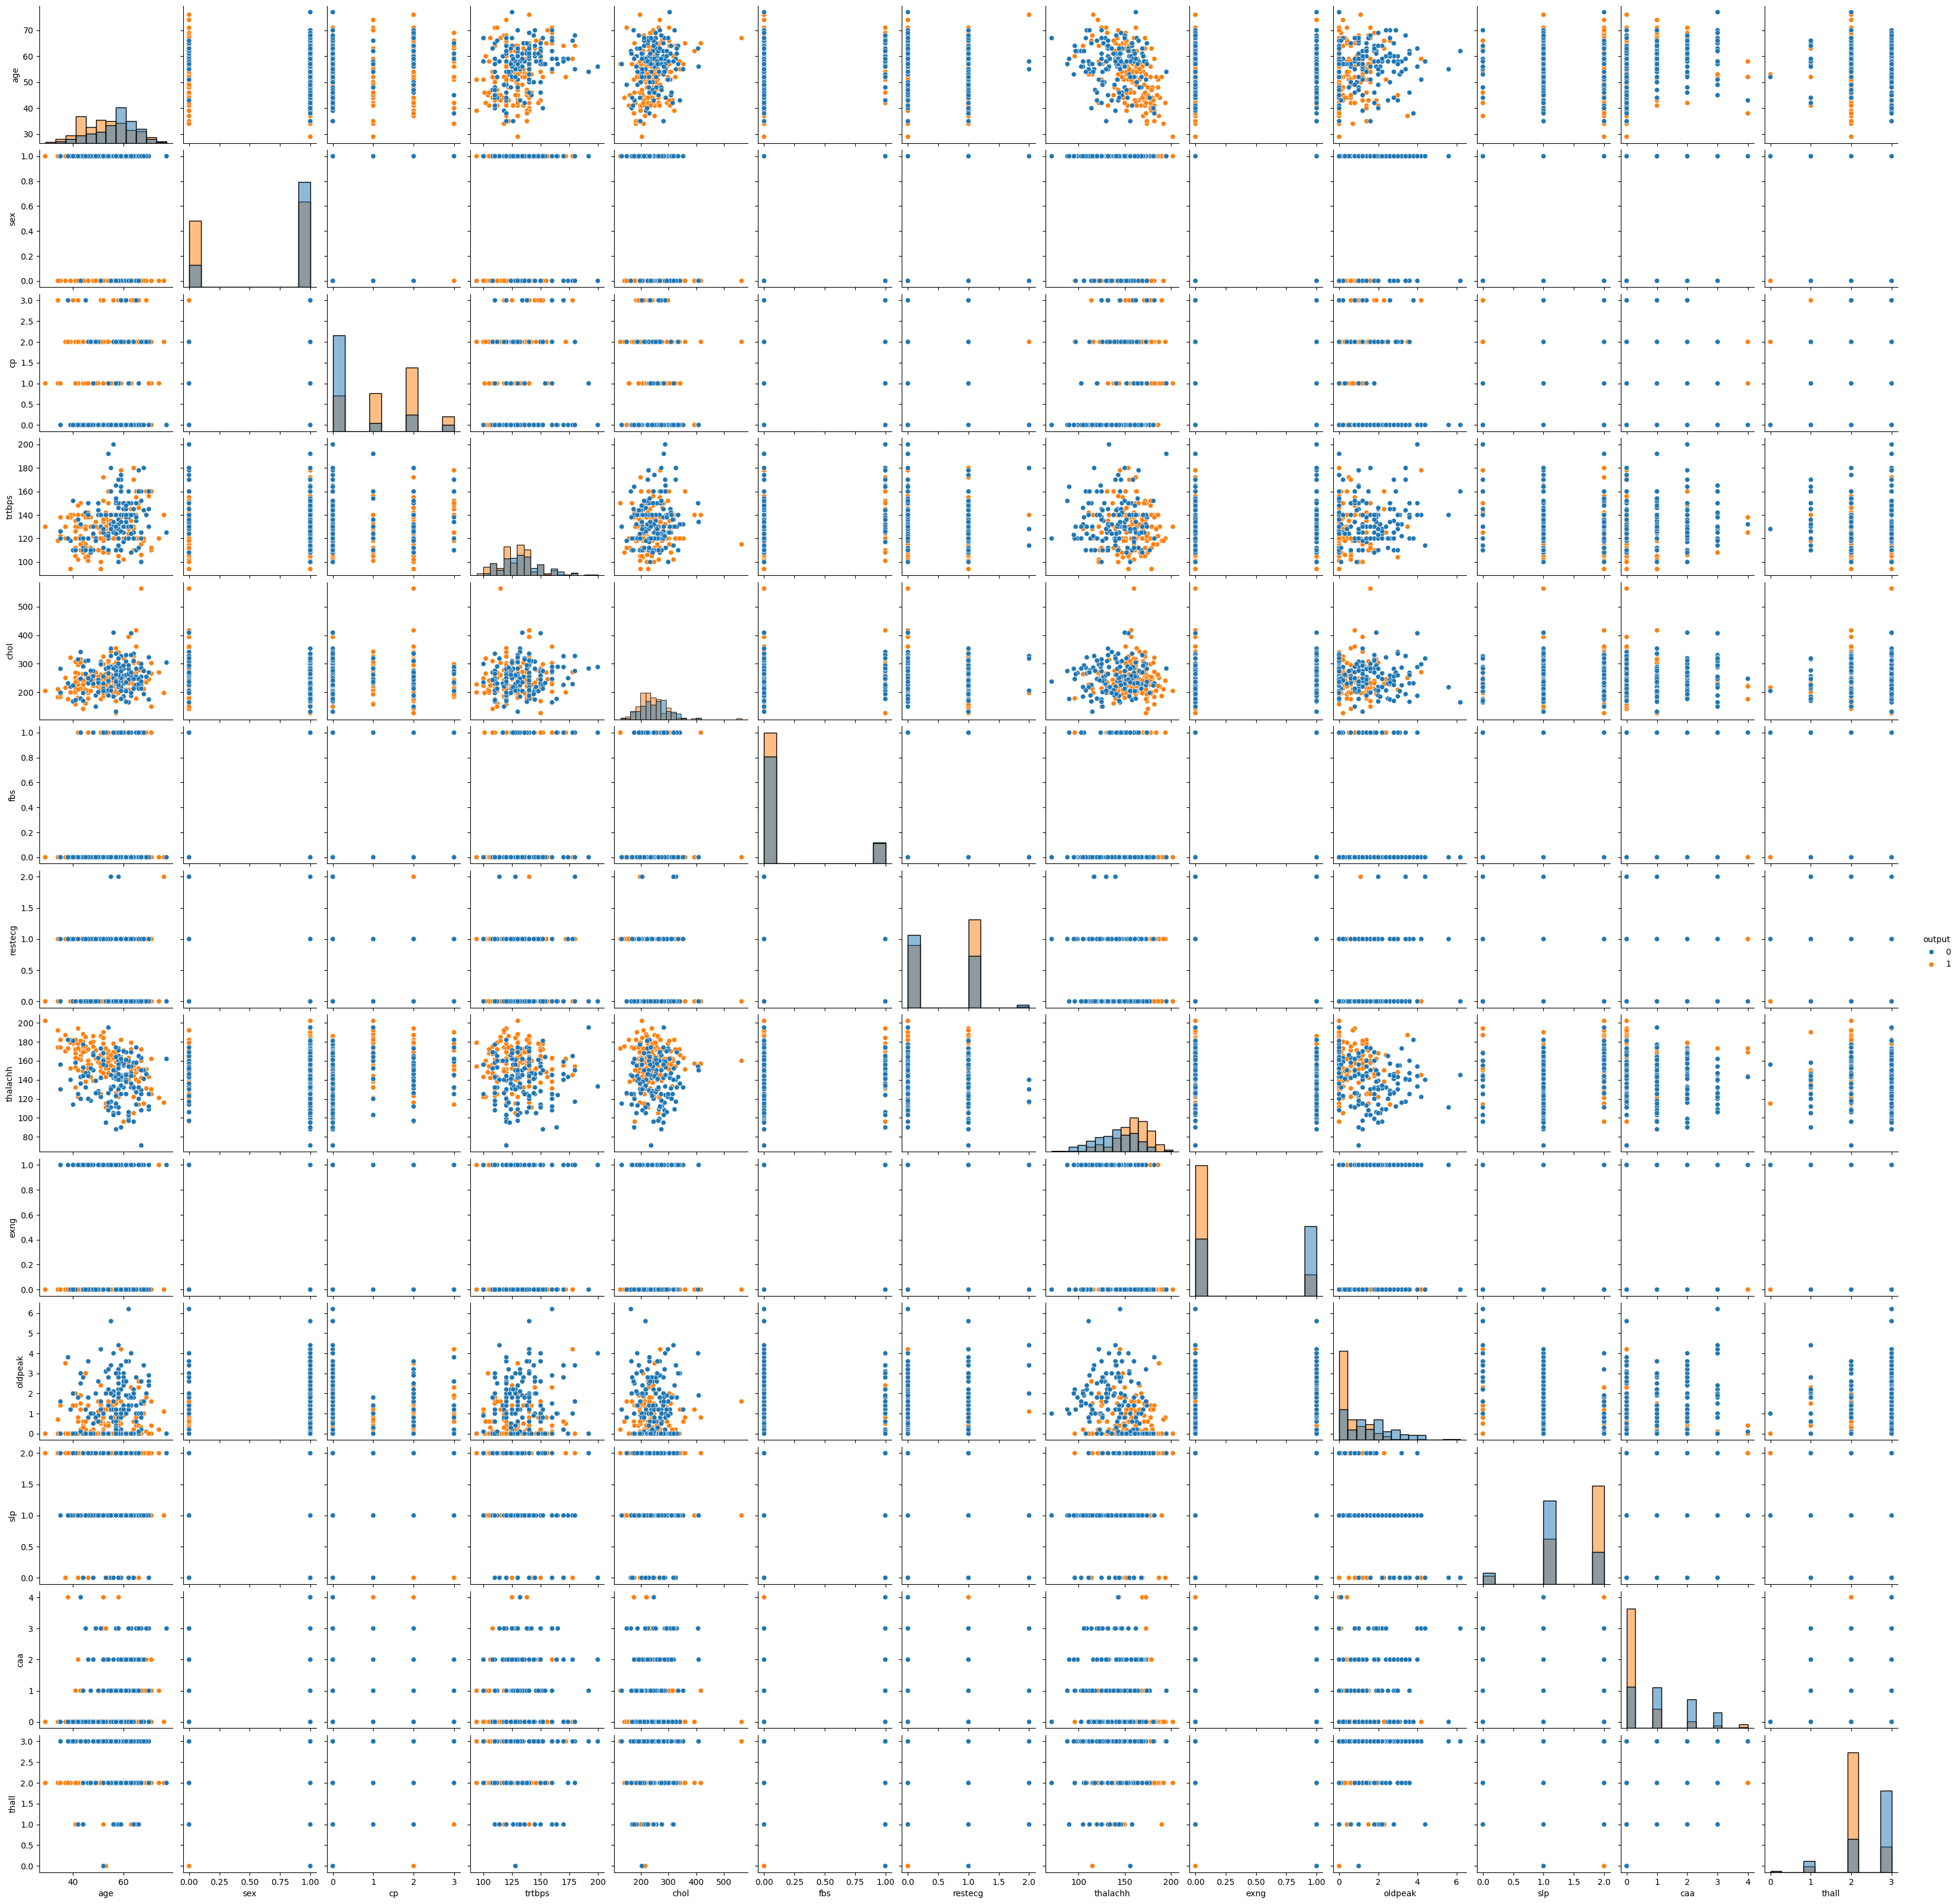

In [7]:
sns.pairplot(data=df, hue='output', diag_kind='hist')
plt.show()

In [8]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

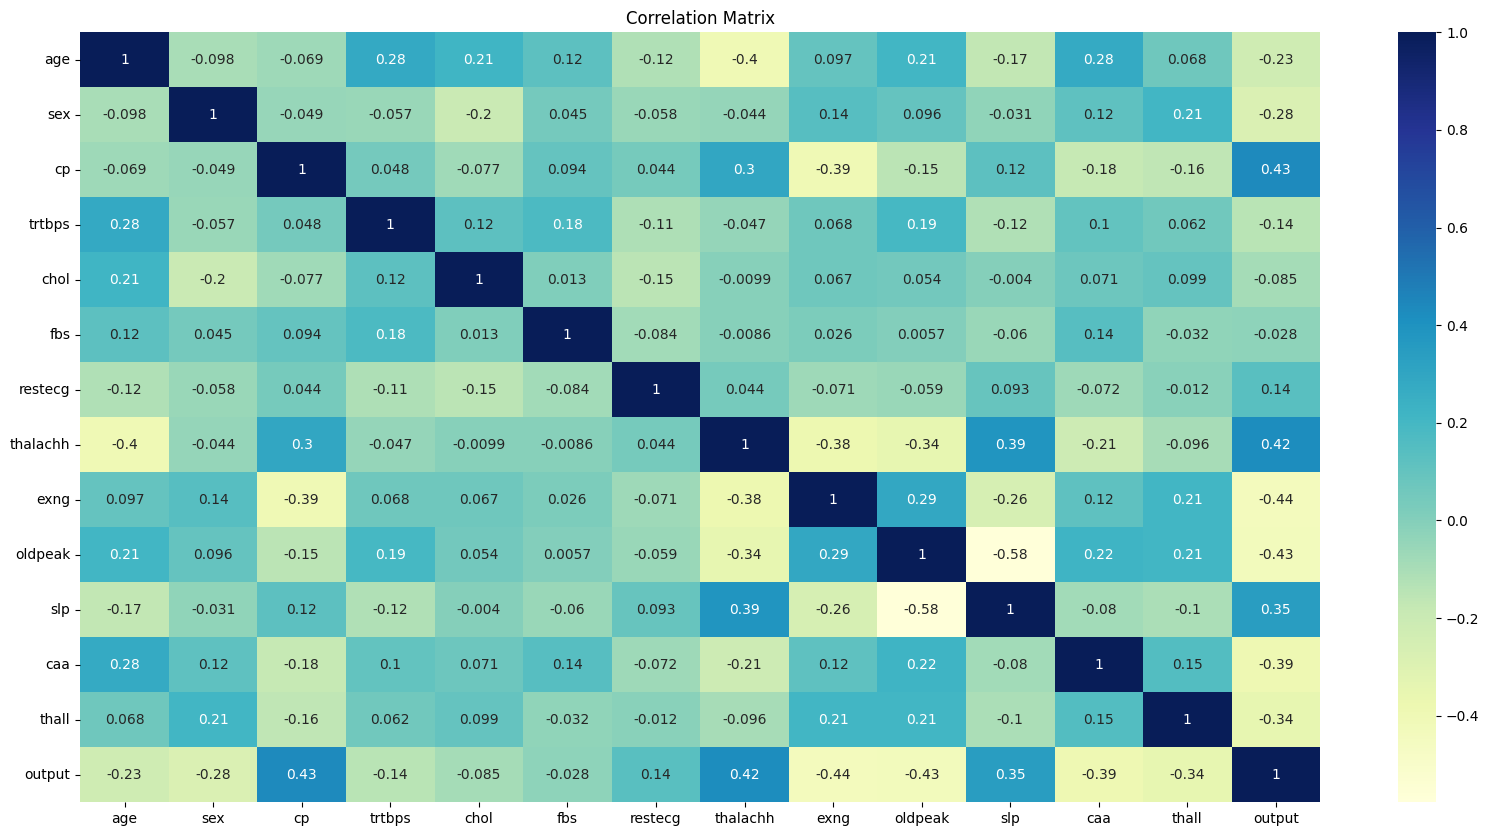

In [9]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()


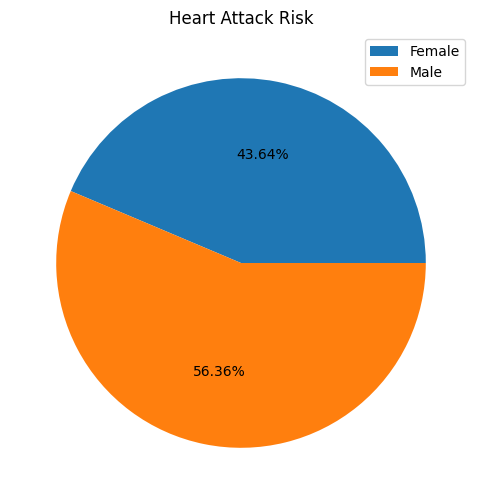

In [10]:
plt.figure(figsize=(10, 6))
gender = df.groupby(df['sex'])['output'].sum()
labels=['Female', 'Male']
ax = gender.plot(kind='pie', y='sex', autopct='%.2f%%', labels=labels, title='Heart Attack Risk', ylabel='', labeldistance=None)
ax.legend()
plt.show()

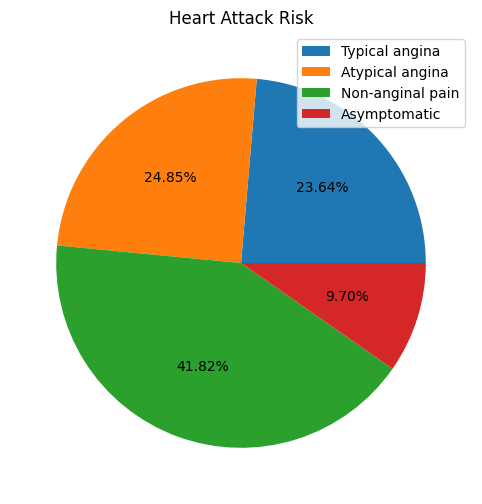

In [11]:
plt.figure(figsize=(10, 6))
smoking = df.groupby(df['cp'])['output'].sum()
labels=['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic']
ax = smoking.plot(kind='pie', y='cp', autopct='%.2f%%', labels=labels, title='Heart Attack Risk', ylabel='', labeldistance=None)
ax.legend()
plt.show()

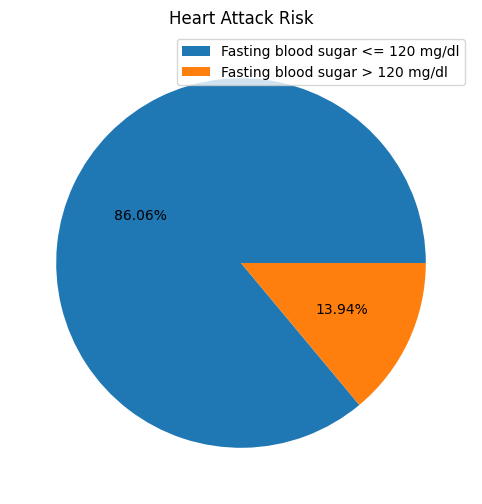

In [12]:
plt.figure(figsize=(10, 6))
diabetes = df.groupby(df['fbs'])['output'].sum()
labels=['Fasting blood sugar <= 120 mg/dl', 'Fasting blood sugar > 120 mg/dl']
ax = diabetes.plot(kind='pie', y='fbs', autopct='%.2f%%', labels=labels, title='Heart Attack Risk', ylabel='', labeldistance=None)
ax.legend()
plt.show()

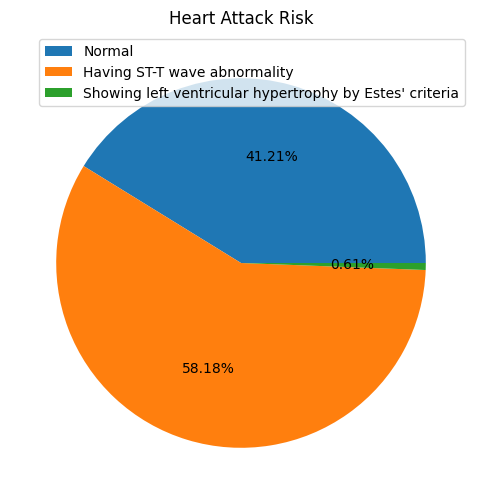

In [13]:
plt.figure(figsize=(10, 6))
diabetes = df.groupby(df['restecg'])['output'].sum()
labels=['Normal', 'Having ST-T wave abnormality', '''Showing left ventricular hypertrophy by Estes' criteria''']
ax = diabetes.plot(kind='pie', y='restecg', autopct='%.2f%%', labels=labels, title='Heart Attack Risk', ylabel='', labeldistance=None)
ax.legend()
plt.show()

In [14]:
def boxplot(y, ylabel):
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x='output', y=y, data=df)
    
    # Label the statistics
    for category in df['output'].unique():
        filtered_df = df[df['output'] == category]
        
        # Calculate statistics
        upper = filtered_df[y].max()
        q3 = filtered_df[y].quantile(0.75)
        median = filtered_df[y].median()
        q1 = filtered_df[y].quantile(0.25)
        lower = filtered_df[y].min()
        
        # Label the statistics on the plot
        ax.text(category, upper, f'Maximum: {upper}', ha='center', va='bottom')
        ax.text(category, q3, f'Upper quartile: {q3}', ha='center', va='bottom')
        ax.text(category, median, f'Median: {median}', ha='center', va='bottom')
        ax.text(category, q1, f'Lower quartile: {q1}', ha='center', va='bottom')
        ax.text(category, lower, f'Minimum: {lower}', ha='center', va='bottom')
    
    plt.xlabel('Heart Attack Risk')
    plt.ylabel(ylabel)
    plt.show()

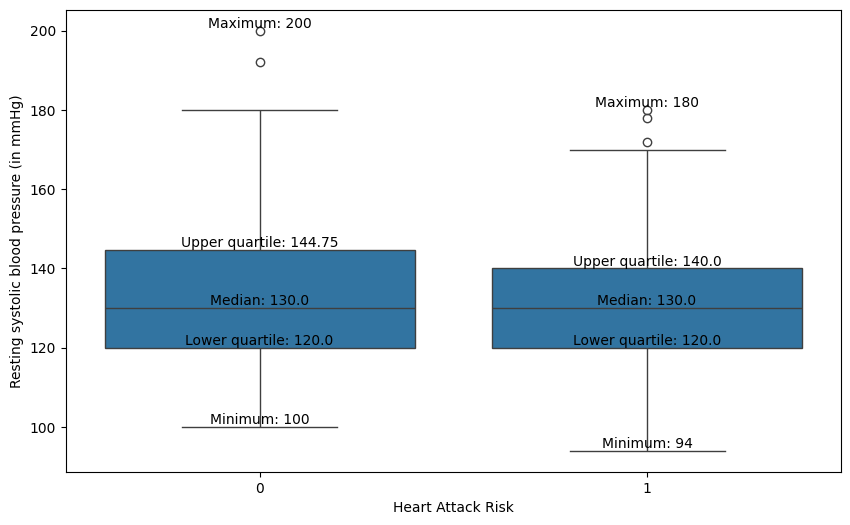

In [15]:
boxplot('trtbps', 'Resting systolic blood pressure (in mmHg)')

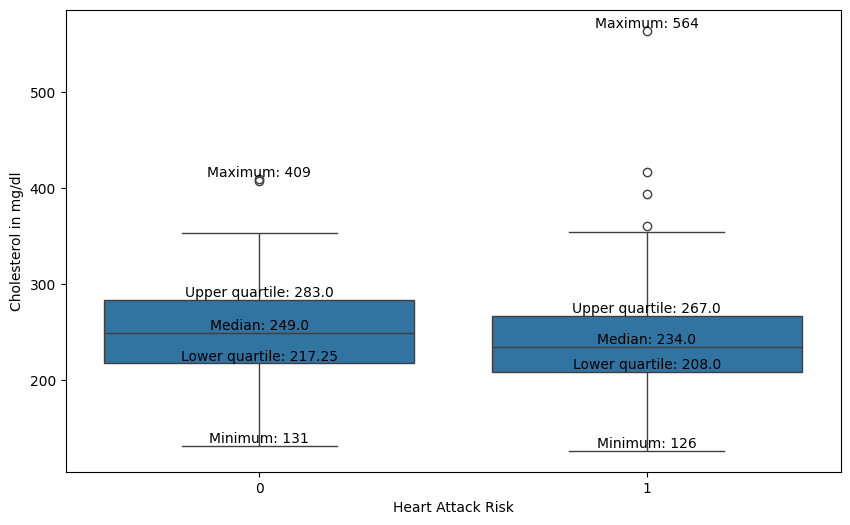

In [16]:
boxplot('chol', 'Cholesterol in mg/dl')

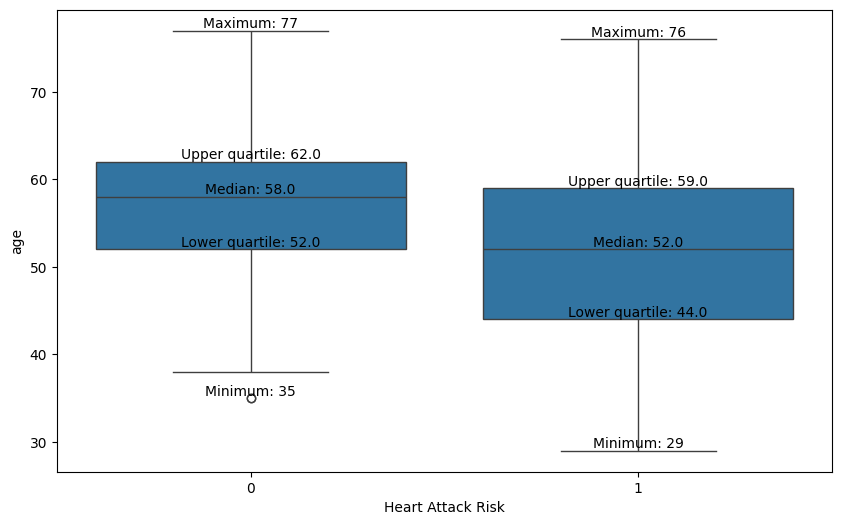

In [17]:
boxplot('age', 'age')

## Feature Engineering

In [18]:
df = df.drop_duplicates()

### Encoding for categorical features

In [19]:
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'], drop_first=True, dtype='int64')

### Scaling the continuous features

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']] = scaler.fit_transform(df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']])

In [21]:
df.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        302 non-null    float64
 1   trtbps     302 non-null    float64
 2   chol       302 non-null    float64
 3   thalachh   302 non-null    float64
 4   oldpeak    302 non-null    float64
 5   output     302 non-null    int64  
 6   sex_1      302 non-null    int64  
 7   cp_1       302 non-null    int64  
 8   cp_2       302 non-null    int64  
 9   cp_3       302 non-null    int64  
 10  fbs_1      302 non-null    int64  
 11  restecg_1  302 non-null    int64  
 12  restecg_2  302 non-null    int64  
 13  exng_1     302 non-null    int64  
 14  slp_1      302 non-null    int64  
 15  slp_2      302 non-null    int64  
 16  caa_1      302 non-null    int64  
 17  caa_2      302 non-null    int64  
 18  caa_3      302 non-null    int64  
 19  caa_4      302 non-null    int64  
 20  thall_1    302 

In [23]:
df.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


## Building the Model

In [24]:
X = df.drop('output', axis=1)
y = df['output']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(241, 22) (61, 22) (241,) (61,)


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

In [28]:
def metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Low risk of heart attack', 'High risk of heart attack'])
    return accuracy, matrix, report

In [29]:
def conf_matrix(matrix):
    plt.figure(figsize=(9, 9))
    sns.heatmap(matrix, annot=True, fmt='.4f', cmap='YlGnBu')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')

### Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logr = LogisticRegression(max_iter=100)

In [32]:
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)

In [33]:
accuracy, matrix, report = metrics(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')
print(f'Classification Report:\n{report}')

Accuracy: 0.9016393442622951

Classification Report:
                           precision    recall  f1-score   support

 Low risk of heart attack       0.87      0.93      0.90        29
High risk of heart attack       0.93      0.88      0.90        32

                 accuracy                           0.90        61
                macro avg       0.90      0.90      0.90        61
             weighted avg       0.90      0.90      0.90        61



#### Hyperparameter tuning for Logistic Regression

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
params = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']} # l1 lasso l2 ridge

grid_search = GridSearchCV(estimator=logr, param_grid=params, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

C:\Users\arith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\arith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

Best Parameters: {'C': 10.0, 'penalty': 'l2'}
Best Score: 0.8463435374149659
Accuracy: 0.9016393442622951


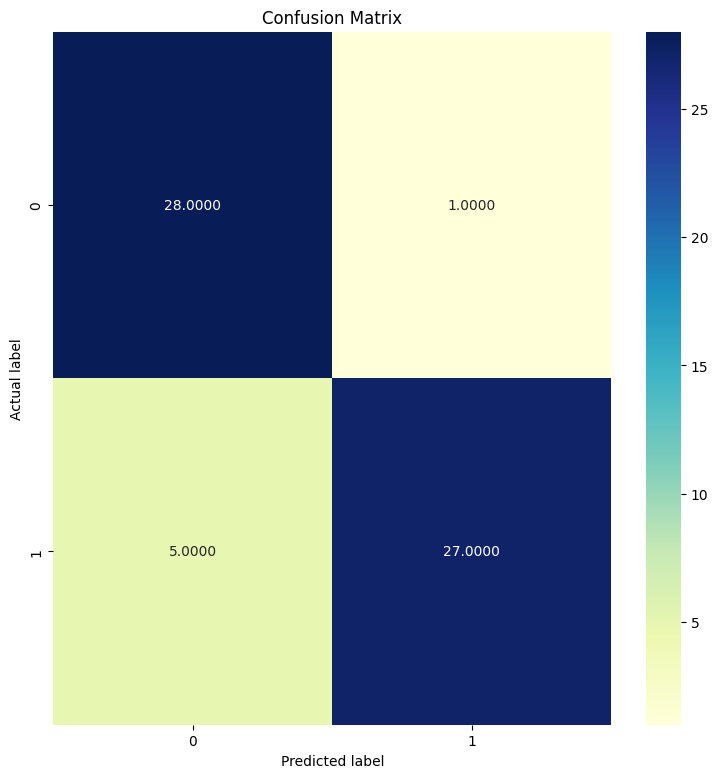

In [36]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy, matrix, report = metrics(y_test, y_pred)
conf_matrix(matrix)
print(f'Accuracy: {accuracy}')

AUC: 0.9046336206896551


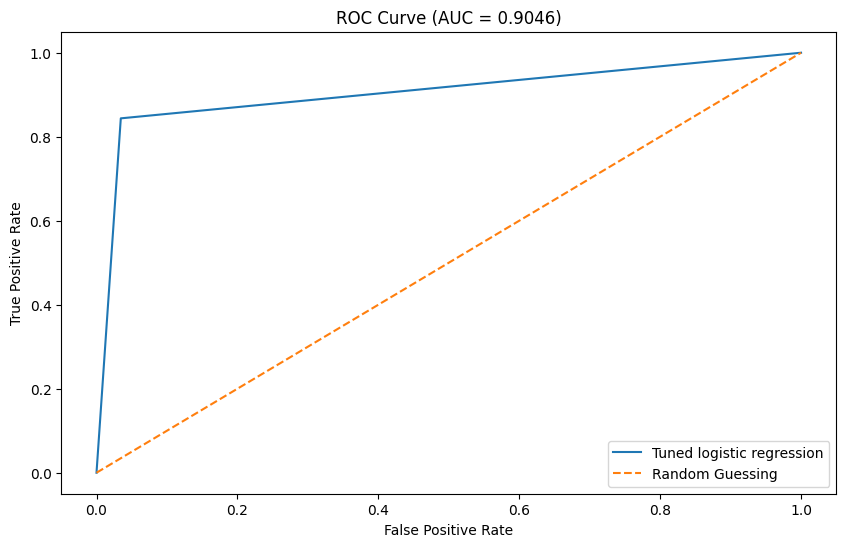

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Tuned logistic regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc:.4f})')
plt.legend(loc='lower right')
plt.show()

### Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc = RandomForestClassifier(random_state=42)

In [40]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [41]:
accuracy, matrix, report = metrics(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')
print(f'Classification Report:\n{report}')

Accuracy: 0.819672131147541

Classification Report:
                           precision    recall  f1-score   support

 Low risk of heart attack       0.78      0.86      0.82        29
High risk of heart attack       0.86      0.78      0.82        32

                 accuracy                           0.82        61
                macro avg       0.82      0.82      0.82        61
             weighted avg       0.82      0.82      0.82        61



#### Hyperparameter tuning for Random Forest Classifier

In [42]:
params = {'max_features': ['sqrt', 'log2', None], 'criterion': ['gini', 'entropy', 'log_loss']}

grid_search = GridSearchCV(estimator=rfc, param_grid=params, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='accuracy')

Best Parameters: {'criterion': 'entropy', 'max_features': 'sqrt'}
Best Score: 0.8130102040816325
Accuracy: 0.8360655737704918


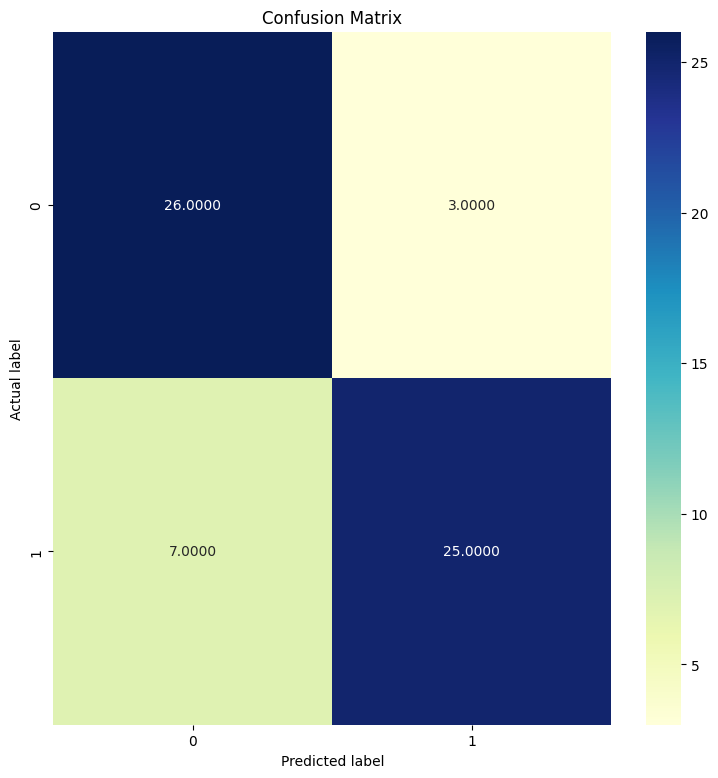

In [43]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy, matrix, report = metrics(y_test, y_pred)
conf_matrix(matrix)
print(f'Accuracy: {accuracy}')

### Support Vector Machines (SVM)

In [44]:
from sklearn.svm import SVC

In [45]:
svm = SVC(random_state=42)

In [46]:
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [47]:
accuracy, matrix, report = metrics(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')
print(f'Classification Report:\n{report}')

Accuracy: 0.8688524590163934

Classification Report:
                           precision    recall  f1-score   support

 Low risk of heart attack       0.82      0.93      0.87        29
High risk of heart attack       0.93      0.81      0.87        32

                 accuracy                           0.87        61
                macro avg       0.87      0.87      0.87        61
             weighted avg       0.88      0.87      0.87        61



#### Hyperparameter tuning for Support Vector Machine

In [48]:
params = {'C': np.logspace(-2, 2, 5), 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}

grid_search = GridSearchCV(estimator=svm, param_grid=params, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

Best Parameters: {'C': 10.0, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.8422619047619048
Accuracy: 0.8688524590163934


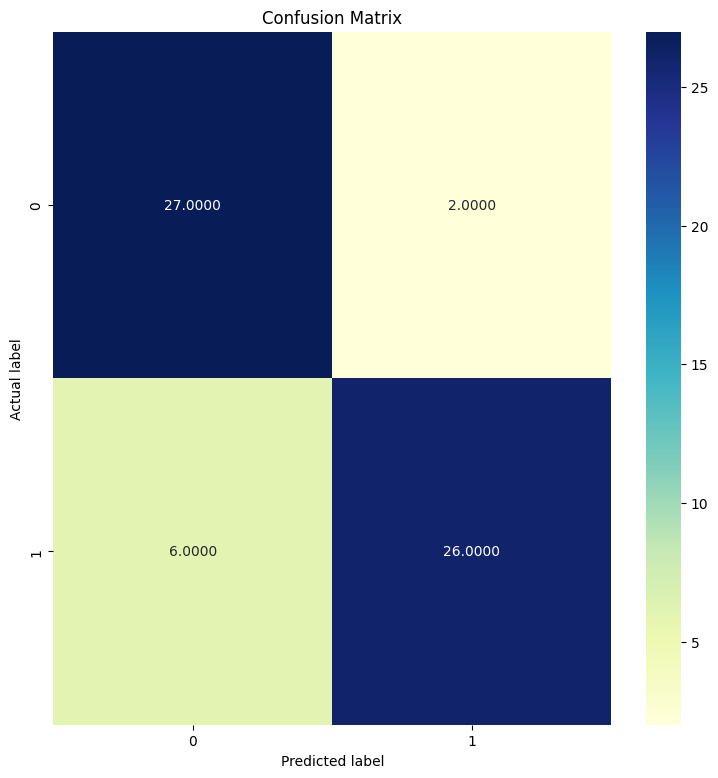

In [49]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy, matrix, report = metrics(y_test, y_pred)
conf_matrix(matrix)
print(f'Accuracy: {accuracy}')

### K-Nearest Neighbours

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier()

In [52]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [53]:
accuracy, matrix, report = metrics(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')
print(f'Classification Report:\n{report}')

Accuracy: 0.8688524590163934

Classification Report:
                           precision    recall  f1-score   support

 Low risk of heart attack       0.84      0.90      0.87        29
High risk of heart attack       0.90      0.84      0.87        32

                 accuracy                           0.87        61
                macro avg       0.87      0.87      0.87        61
             weighted avg       0.87      0.87      0.87        61



#### Hyperparameter tuning for K-Nearest Neighbours

In [54]:
params = {'n_neighbors': np.arange(1, 31), 'weights': ['uniform', 'distance'], 'p': [1, 2]}  # 1 for Manhattan distance, 2 for Euclidean distance

grid_search = GridSearchCV(estimator=knn, param_grid=params, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

Best Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best Score: 0.8255952380952382
Accuracy: 0.8688524590163934


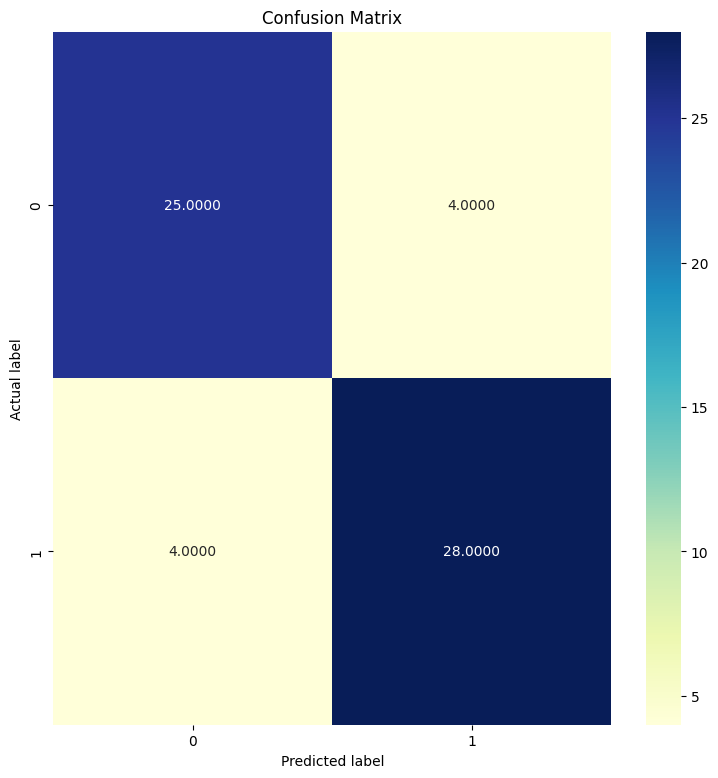

In [55]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy, matrix, report = metrics(y_test, y_pred)
conf_matrix(matrix)
print(f'Accuracy: {accuracy}')